In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd
import numpy as np

In [52]:
# https://statisztika.mnb.hu/publikacios-temak/kamatlabak_-penz-es-tokepiaci-adatok/allampapirpiaci-referenciahozamok/allampapirpiaci-referenciahozamok
df = pd.read_csv("hu_benchmark.csv")
df.rename({"Unnamed: 1": "hónap", "Hó végén": "év"}, axis=1, inplace=True)
df.dropna(how='all', inplace=True)
df['év'] = df['év'].ffill()
df['év'] = df['év'].astype(int)

# dátum átalakítása
magyar_honapok = {
    'augusztus': 8,
    'december': 12,
    'február': 2,
    'január': 1,
    'július': 7,
    'június': 6,
    'május': 5,
    'március': 3,
    'november': 11,
    'október': 10,
    'szeptember': 9,
    'április': 4
}
df["hónap_szám"] = [ magyar_honapok[h] for h in df["hónap"]]
df["dátum"] = pd.to_datetime(df["év"].astype(str) + '/' + df["hónap_szám"].astype(str) + '/01') + MonthEnd(0)
df.drop(["év", "hónap", "hónap_szám"], axis=1, inplace=True)
df.tail(12)

,3 hónap,6 hónap,1 év,2 év,3 év,5 év,10 év,15 év,20 év,dátum
331,6.59,6.63,6.62,NaN,6.79,6.73,6.74,6.70,6.71,2024-03-31
332,6.85,6.85,6.87,NaN,7.24,7.17,7.03,7.04,7.05,2024-04-30
333,6.56,6.71,6.70,NaN,6.96,6.91,6.94,6.94,6.97,2024-05-31
334,6.21,6.29,6.17,NaN,6.62,6.67,6.81,6.80,6.80,2024-06-30
335,5.03,5.88,5.55,NaN,5.93,5.94,6.39,6.44,6.46,2024-07-31
336,5.46,5.46,5.47,NaN,5.86,5.84,6.29,6.37,6.42,2024-08-31
337,5.32,5.26,5.32,NaN,5.61,5.66,6.13,6.30,6.41,2024-09-30
338,5.35,5.34,5.33,NaN,6.56,6.60,6.89,6.93,7.00,2024-10-31
339,5.69,5.85,5.64,NaN,6.07,5.81,6.34,6.58,6.64,2024-11-30
340,5.10,5.23,5.24,NaN,6.38,6.07,6.55,6.90,6.94,2024-12-31


In [13]:
ido = {"3 hónap": 3, "6 hónap": 6, "1 év": 12, "2 év": 24, "3 év": 36, "5 év": 60, "10 év": 120, "15 év": 180,  "20 év": 240 }

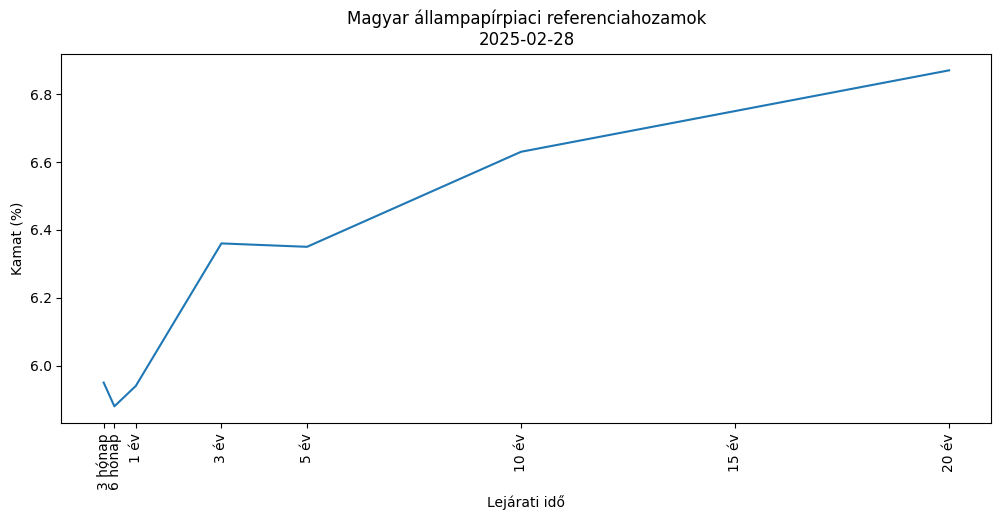

In [43]:
index = -1
idopillanat = df.iloc[index, -1].date()
ido_label = df.iloc[index,:-1].dropna().index.values
time = [ ido[x] for x in ido_label ]
f = plt.figure()
f.set_figwidth(12)

plt.plot(time, df.iloc[index,:-1].dropna().values)
plt.xticks(time, ido_label, rotation='vertical')
plt.ylabel("Kamat (%)")
plt.xlabel("Lejárati idő")
plt.title(f"Magyar állampapírpiaci referenciahozamok\n{idopillanat}")
plt.show()

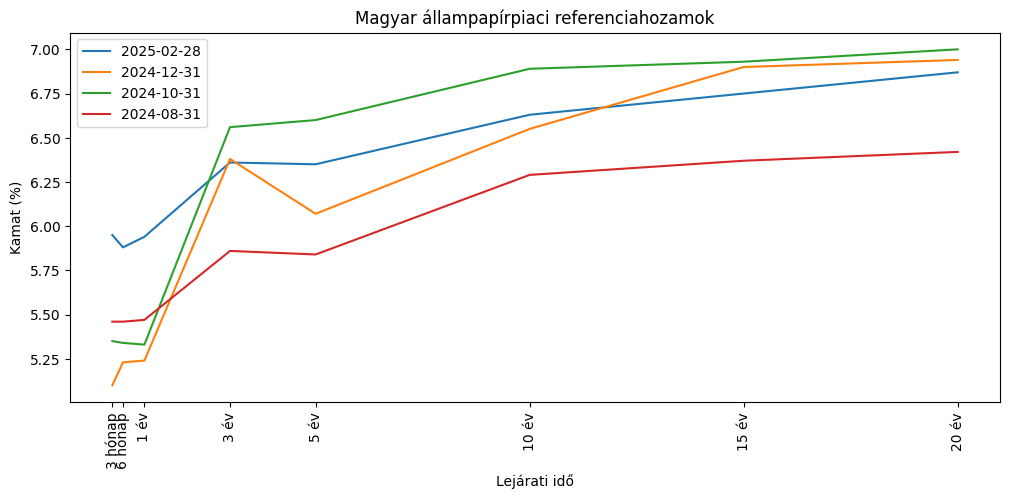

In [51]:
f = plt.figure()
f.set_figwidth(12)

for i in range(4):
    index = (i*-2)-1
    idopillanat = df.iloc[index, -1].date()
    ido_label = df.iloc[index,:-1].dropna().index.values
    time = [ ido[x] for x in ido_label ]

    plt.plot(time, df.iloc[index,:-1].dropna().values, label=idopillanat)

plt.xticks(time, ido_label, rotation='vertical')
plt.ylabel("Kamat (%)")
plt.xlabel("Lejárati idő")
plt.title(f"Magyar állampapírpiaci referenciahozamok")
plt.legend()
plt.show()